<a href="https://colab.research.google.com/github/4nands/4nands.github.io/blob/main/Bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

808


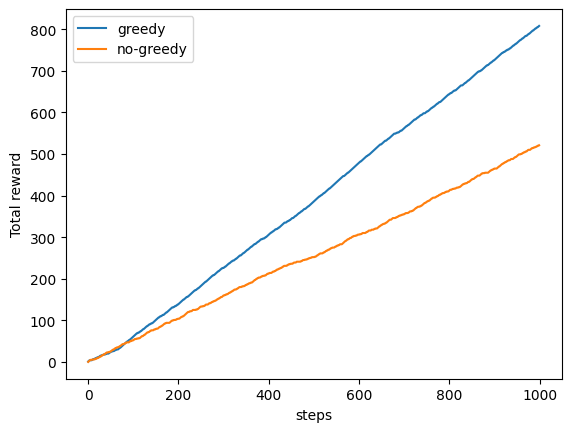

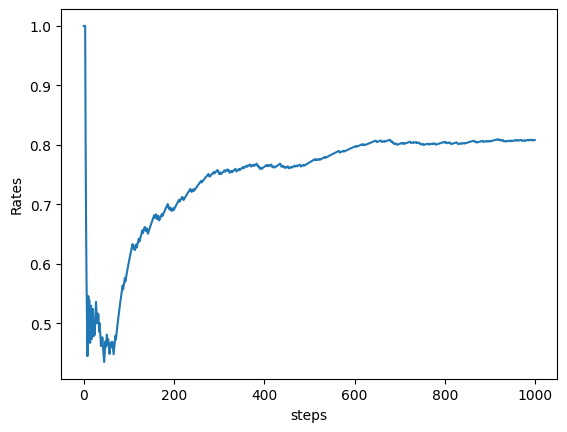

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:

  def __init__(self,arms=10):

    self.rates = np.random.rand(arms)

  def play(self,arm):

    return (self.rates[arm]> np.random.rand()).astype(int)


class Agent:

  def __init__(self,eps,action_size=10):

    self.eps = eps
    self.Qs = np.zeros(action_size)
    self.ns = np.zeros(action_size)

  def update(self,action,reward):

    self.ns[action] += 1
    self.Qs[action] += (reward-self.Qs[action]) / self.ns[action]

  def get_action(self):

    if np.random.rand() < self.eps:

      return np.random.randint(len(self.Qs))

    else:
      return np.argmax(self.Qs)


steps = 1000
eps = 0.1
M = 10

bandit = Bandit(arms=M)
agent = Agent(eps)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
  action = agent.get_action()
  reward = bandit.play(action)
  agent.update(action,reward)
  total_reward += reward

  total_rewards += [total_reward]
  rates += [total_reward/(step+1)]

print(total_reward)


total_reward2 = 0
total_rewards2 = []

for step in range(steps):
  action = np.random.randint(M)
  total_reward2 += bandit.play(action)
  total_rewards2 += [total_reward2]



plt.ylabel('Total reward')
plt.xlabel('steps')
plt.plot(total_rewards,label='greedy')
plt.plot(total_rewards2,label='no-greedy')
plt.legend(loc='best')
plt.show()

plt.ylabel('Rates')
plt.xlabel('steps')
plt.plot(rates)
plt.show()



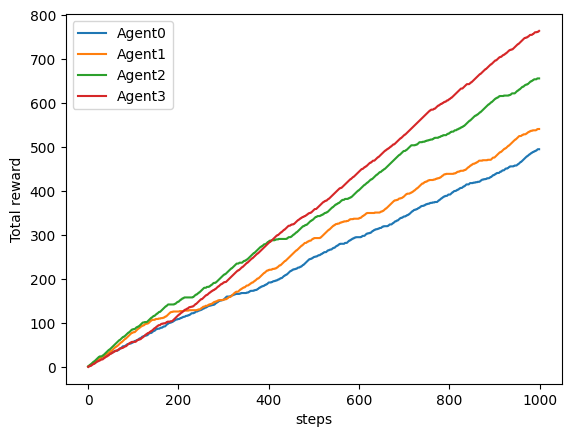

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math

class Bandit:

  def __init__(self,arms=10):

    self.arms = arms
    self.rates = np.random.rand(arms)

  def play(self,arm):

    rate = self.rates[arm]
    self.rates += 0.1*np.random.randn(self.arms)
    self.rates = np.clip(self.rates,0.0,1.0)

    return (rate > np.random.rand()).astype(int)


class Agent:

  def __init__(self,eps,action_size=10):

    self.eps = eps
    self.Qs = np.zeros(action_size)
    self.ns = np.zeros(action_size)

  def update(self,action,reward):

    self.ns[action] += 1
    self.Qs[action] += (reward-self.Qs[action]) / self.ns[action]

  def get_action(self):

    if np.random.rand() < self.eps:

      return np.random.randint(len(self.Qs))

    else:
      return np.argmax(self.Qs)

class AlphaAgent:

  def __init__(self,eps,alpha,action_size=10):

    self.eps = eps
    self.Qs = np.zeros(action_size)
    self.alpha = alpha

  def update(self,action,reward):

    a = self.alpha

    self.Qs[action] = a*(reward-self.Qs[action])

  def get_action(self):

    if np.random.rand() < self.eps:

      return np.random.randint(len(self.Qs))

    else:
      return np.argmax(self.Qs)


class UCB1:

  def __init__(self,action_size=10):

    self.Qs = np.zeros(action_size)

    self.n =np.zeros(action_size)
    self.w =np.zeros(action_size)
    self.v =np.zeros(action_size)

    self.arm = None
    self.time = 0

  def update(self,action,reward):
    arm = self.arm
    self.time += 1

    self.n[arm] += 1

    if reward == 1.0:
      self.w[arm] += 1

    for i in range(len(self.n)):
      if self.n[i] == 0:
        return

    for i in range(len(self.v)):
      self.v[i] = self.w[i] /self.n[i] +(2*math.log(self.time) / self.n[i]) ** 0.5


  def get_action(self):

    self.arm = np.argmax(self.v)


    for i in range(len(self.n)):
      if self.n[i] == 0:
        self.arm = i
        break

    return self.arm


steps = 1000
M = 10

eps = 0.1
alpha = 0.3

np.random.seed(0)

bandit0 = Bandit(arms=M)
bandit1 = Bandit(arms=M)
bandit2 = Bandit(arms=M)
bandit3 = Bandit(arms=M)
agent1 = Agent(eps)
agent2 = AlphaAgent(eps,alpha)
agent3 = UCB1()
total_reward0 = 0
total_rewards0 = []
total_reward1 = 0
total_rewards1 = []
total_reward2 = 0
total_rewards2 = []
total_reward3 = 0
total_rewards3 = []

for step in range(steps):
  action = np.random.randint(M)
  total_reward0 += bandit0.play(action)
  total_rewards0 += [total_reward0]

for step in range(steps):
  action = agent1.get_action()
  reward = bandit1.play(action)
  agent1.update(action,reward)
  total_reward1 += reward
  total_rewards1 += [total_reward1]

for step in range(steps):
  action = agent2.get_action()
  reward = bandit2.play(action)
  agent2.update(action,reward)
  total_reward2 += reward
  total_rewards2 += [total_reward2]

for step in range(steps):
  action = agent3.get_action()
  reward = bandit3.play(action)
  agent3.update(action,reward)
  total_reward3 += reward
  total_rewards3 += [total_reward3]




plt.ylabel('Total reward')
plt.xlabel('steps')
plt.plot(total_rewards0,label='Agent0')
plt.plot(total_rewards1,label='Agent1')
plt.plot(total_rewards2,label='Agent2')
plt.plot(total_rewards3,label='Agent3')
plt.legend(loc='best')
plt.show()



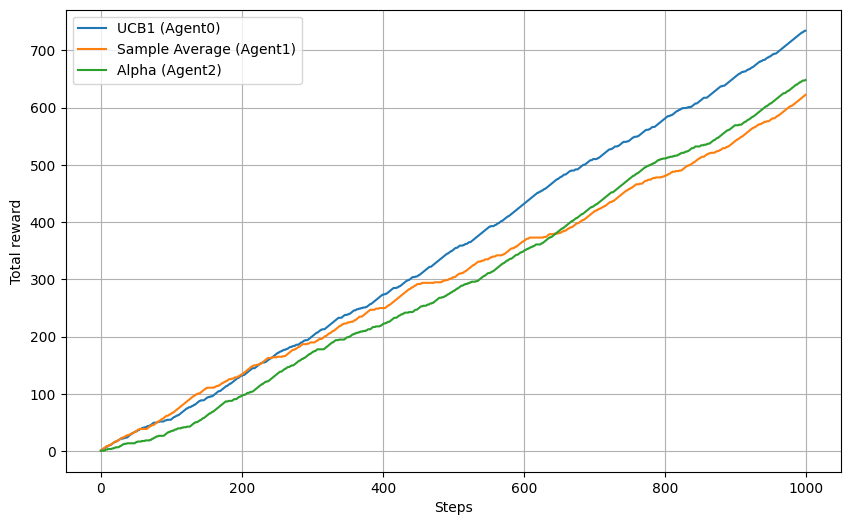

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math

class Bandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        # 非定常設定：報酬率を変動させる
        self.rates += 0.1 * np.random.randn(self.arms)
        self.rates = np.clip(self.rates, 0.0, 1.0)
        return 1 if rate > np.random.rand() else 0

class Agent: # 標本平均
    def __init__(self, eps, action_size=10):
        self.eps = eps
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self):
        if np.random.rand() < self.eps:
            return np.random.randint(len(self.Qs))
        return np.argmax(self.Qs)

class AlphaAgent: # 定数ステップサイズ（非定常に強い）
    def __init__(self, eps, alpha, action_size=10):
        self.eps = eps
        self.Qs = np.zeros(action_size)
        self.alpha = alpha

    def update(self, action, reward):
        # 式を修正
        self.Qs[action] += self.alpha * (reward - self.Qs[action])

    def get_action(self):
        if np.random.rand() < self.eps:
            return np.random.randint(len(self.Qs))
        return np.argmax(self.Qs)

class UCB1:
    def __init__(self, action_size=10):
        self.n = np.zeros(action_size)
        self.w = np.zeros(action_size)
        self.v = np.zeros(action_size)
        self.time = 0

    def update(self, action, reward, total_time):
        self.n[action] += 1
        if reward == 1:
            self.w[action] += 1

        # 全ての腕のスコアを再計算
        for i in range(len(self.n)):
            if self.n[i] > 0:
                mean = self.w[i] / self.n[i]
                # total_timeを使用
                bonus = math.sqrt(2 * math.log(total_time) / self.n[i])
                self.v[i] = mean + bonus

    def get_action(self):
        for i in range(len(self.n)):
            if self.n[i] == 0: return i
        return np.argmax(self.v)

# 設定
steps = 1000
M = 10
np.random.seed(0)

# エージェント初期化
# 非定常問題なので alpha は小さめ、UCB1は原理的に非定常には弱いです
agents = [UCB1(M), Agent(0.1, M), AlphaAgent(0.1, 0.1, M)]
labels = ['UCB1 (Agent0)', 'Sample Average (Agent1)', 'Alpha (Agent2)']
results = []

for i, agent in enumerate(agents):
    bandit = Bandit(arms=M)
    total_reward = 0
    rewards_history = []

    for step in range(1, steps + 1):
        action = agent.get_action()
        reward = bandit.play(action)

        if isinstance(agent, UCB1):
            agent.update(action, reward, step)
        else:
            agent.update(action, reward)

        total_reward += reward
        rewards_history.append(total_reward)
    results.append(rewards_history)

# 描画
plt.figure(figsize=(10, 6))
for i in range(len(results)):
    plt.plot(results[i], label=labels[i])

plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.legend()
plt.grid(True)
plt.show()
